In [24]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [25]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)

In [26]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [27]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
print(f"Number of cities generated: {len(cities)}")

Number of cities generated: 608


In [28]:
# Build base url for api requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | castro verde
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | kashi
Processing Record 8 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 1 | seoul
Processing Record 10 of Set 1 | agadir
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | gaimersheim
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | dawei
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | roebourne
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | beyneu
Processing Re

Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | negele
City not found. Skipping...
Processing Record 37 of Set 4 | verkhnevilyuysk
Processing Record 38 of Set 4 | ponta delgada
Processing Record 39 of Set 4 | klyuchi
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | yarmouth
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | karamea
City not found. Skipping...
Processing Record 45 of Set 4 | sosnovo-ozerskoye
Processing Record 46 of Set 4 | aguadilla
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | mecca
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | wuning
Processing Record 1 of Set 5 | san buenaventura
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | marsh harbour
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing 

Processing Record 23 of Set 8 | magadan
Processing Record 24 of Set 8 | sohag
Processing Record 25 of Set 8 | caravelas
Processing Record 26 of Set 8 | bambous virieux
Processing Record 27 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 28 of Set 8 | paducah
Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | smidovich
Processing Record 33 of Set 8 | tibati
Processing Record 34 of Set 8 | kiunga
Processing Record 35 of Set 8 | matara
Processing Record 36 of Set 8 | leningradskiy
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | estelle
Processing Record 39 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 41 of Set 8 | rudkobing
Processing Record 42 of Set 8 | aktash
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | husavik
Processi

Processing Record 13 of Set 12 | mitsamiouli
Processing Record 14 of Set 12 | hoi an
Processing Record 15 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 12 | vostok
Processing Record 17 of Set 12 | nguiu
City not found. Skipping...
Processing Record 18 of Set 12 | general roca
Processing Record 19 of Set 12 | alofi
Processing Record 20 of Set 12 | vershino-darasunskiy
Processing Record 21 of Set 12 | bilibino
Processing Record 22 of Set 12 | borovoy
Processing Record 23 of Set 12 | lengshuijiang
Processing Record 24 of Set 12 | syracuse
Processing Record 25 of Set 12 | amursk
Processing Record 26 of Set 12 | mucurapo
Processing Record 27 of Set 12 | batabano
Processing Record 28 of Set 12 | rawatsar
Processing Record 29 of Set 12 | staryy nadym
Processing Record 30 of Set 12 | codrington
Processing Record 31 of Set 12 | oudtshoorn
Processing Record 32 of Set 12 | pilao arcado
City not found. Skipping...
Processing Record 33 of Set 12 | cutler ridge
Proce

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-08-01 09:50:11,-46.1927,168.8643,43.48,98,100,2.64
1,Castro Verde,PT,2021-08-01 09:50:11,37.6983,-8.0858,69.22,40,45,15.70
2,Rikitea,PF,2021-08-01 09:50:12,-23.1203,-134.9692,70.07,72,96,24.23
3,Grand Gaube,MU,2021-08-01 09:50:12,-20.0064,57.6608,75.60,66,1,11.01
4,Guerrero Negro,MX,2021-08-01 09:50:12,27.9769,-114.0611,70.61,83,6,7.29
5,Kapaa,US,2021-08-01 09:50:12,22.0752,-159.3190,80.92,78,40,1.99
6,Kashi,CN,2021-08-01 09:50:13,39.4547,75.9797,83.41,23,75,6.71
7,Seoul,KR,2021-08-01 09:48:42,37.5683,126.9778,85.39,72,90,2.30
8,Agadir,MA,2021-08-01 09:50:13,30.4202,-9.5982,73.85,54,0,5.70
9,Ushuaia,AR,2021-08-01 09:50:14,-54.8000,-68.3000,42.46,61,20,6.91


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

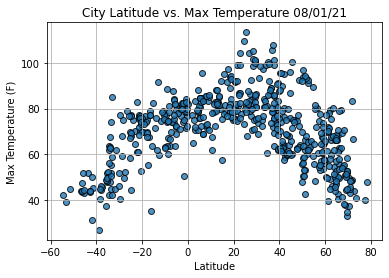

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

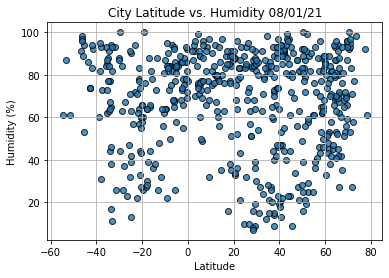

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()